In [1]:
# Data pre-processing
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import openpyxl
import pandas as pd
import numpy as np 
import missingno as msno
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt 

#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pl
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

# Use Case 3:

In [2]:
    #Reading a csv file and storing it into a dataframe.
    CovidVariant = pd.read_csv('covid-variants1.csv')
    CovidVariant.head()

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-12-21,B.1.160,0.0,0.0,93
1,Angola,2020-12-21,B.1.620,0.0,0.0,93
2,Angola,2020-12-21,B.1.258,0.0,0.0,93
3,Angola,2020-12-21,B.1.221,NaN,NaN,93
4,Angola,2020-12-21,B.1.1.302,NaN,NaN,93


Data Pre-Processing

The Dataframe is filtered according to Germany, Variant to Delta.

In [7]:
#Dataframe is filtered
GER = CovidVariant.loc[CovidVariant['location'] == 'Germany']
GERDelta = GER.loc[GER['variant'] == 'Delta']
GERDelta['date'] = pd.to_datetime(GERDelta['date']) 
GERDelta.reset_index(inplace = True)
GERDelta = GERDelta[['location','date','variant','num_sequences','perc_sequences','num_sequences_total']]

GERDelta = GERDelta.rename(columns={"num_sequences":"2_weeks_Delta_cases","perc_sequences":"2_weeks_Delta_cases_%","num_sequences_total":"2_weeks_Delta_tests"})


In [31]:
#Filtering to date from January as the delta cases have been found in 2021.
start_date='2021-01-10'
GERDelta1=GERDelta.loc[GERDelta.date >= pd.to_datetime(start_date)]


In [173]:
GERDelta1

,location,variant,2_weeks_Delta_cases,2_weeks_Delta_cases_%,2_weeks_Delta_tests,Average Daily Delta variants
date,,,,,,
2021-01-11,Germany,Delta,0,0,483,0
2021-01-25,Germany,Delta,0,0,3029,0
2021-02-08,Germany,Delta,1,0,6115,0
2021-02-22,Germany,Delta,0,0,8953,0
2021-03-08,Germany,Delta,0,0,11409,0
2021-03-22,Germany,Delta,1,0,14371,0
2021-04-05,Germany,Delta,3,0,16259,0
2021-04-19,Germany,Delta,29,0,19268,2
2021-05-03,Germany,Delta,133,1,19182,10


In [33]:
#Reading COVID-19 worldwide dataset
CovidCases = pd.read_csv('countries-aggregated.csv')

In [34]:
CovidCases

,Date,Country,Confirmed,Recovered,Deaths
0,22-01-2020,Afghanistan,0,0,0
1,23-01-2020,Afghanistan,0,0,0
2,24-01-2020,Afghanistan,0,0,0
3,25-01-2020,Afghanistan,0,0,0
4,26-01-2020,Afghanistan,0,0,0
...,...,...,...,...,...
110755,07-08-2021,Zimbabwe,115890,0,3826
110756,08-08-2021,Zimbabwe,116327,0,3900
110757,09-08-2021,Zimbabwe,116853,0,3919
110758,10-08-2021,Zimbabwe,117258,0,3950


In [35]:
#Filtering the dataset to Germany
CovidCasesG = CovidCases.loc[CovidCases['Country'] == 'Germany']

In [36]:
CovidCasesG

,Date,Country,Confirmed,Recovered,Deaths
37488,22-01-2020,Germany,0,0,0
37489,23-01-2020,Germany,0,0,0
37490,24-01-2020,Germany,0,0,0
37491,25-01-2020,Germany,0,0,0
37492,26-01-2020,Germany,0,0,0
...,...,...,...,...,...
38051,07-08-2021,Germany,3795609,0,91789
38052,08-08-2021,Germany,3797849,0,91791
38053,09-08-2021,Germany,3800069,0,91810
38054,10-08-2021,Germany,3803351,0,91824


In [37]:
CovidCasesG['Date'] = pd.to_datetime(CovidCasesG['Date'], format='%d-%m-%Y')

In [39]:
#Making the index column as data to analyze.
CovidCasesG.to_csv("CovidCasesG.csv")
CovidCasesG1 = pd.read_csv('CovidCasesG.csv',index_col='Date',parse_dates=True)

In [41]:
#Cropping the Dataframe to match with the Delta dataset
start_date = '2021-01-10'
end_date = '27-07-2021'
CovidCases1=CovidCasesG1.loc[CovidCasesG1.index > pd.to_datetime(start_date)]
CovidCases1=CovidCases1.loc[CovidCases1.index < pd.to_datetime(end_date)]

In [42]:
CovidCases1

,Unnamed: 0,Country,Confirmed,Recovered,Deaths
Date,,,,,
2021-01-11,37843,Germany,1941116,1590171,41799
2021-01-12,37844,Germany,1968326,1616761,42889
2021-01-13,37845,Germany,1993892,1640682,44096
2021-01-14,37846,Germany,2015235,1661394,45207
2021-01-15,37847,Germany,2023828,1664176,45705
...,...,...,...,...,...
2021-07-22,38035,Germany,3758425,3642010,91505
2021-07-23,38036,Germany,3760291,3642120,91514
2021-07-24,38037,Germany,3761869,3643350,91531


In [43]:
#Selecting the Confirmed cases cumulative feature to give input to a Model
CovidCases12 = CovidCases1[['Confirmed']]

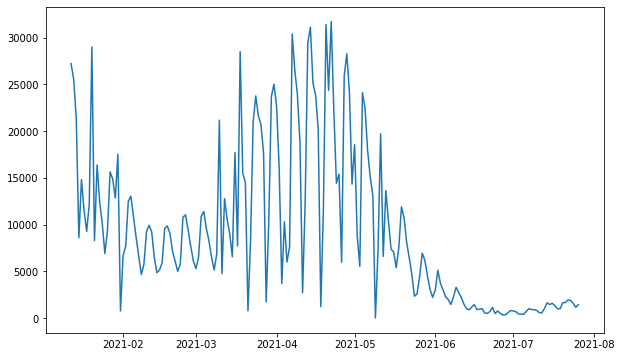

In [45]:
#The figure above shows the everyday cases in Germany, and we can observe the sea-sonal trend in the plot, 
#like initially upward trend and then downward as the number of cases are decreased.
plt.figure(figsize=(10,6))
plt.plot(CovidCases12.diff())

In [46]:
CovidCases12=CovidCases12.diff()
CovidCases12=CovidCases12.dropna()

In [47]:
start1_date='2021-06-20'
train=CovidCases12.loc[CovidCases12.index < pd.to_datetime(start1_date)]
test=CovidCases12.loc[CovidCases12.index >= pd.to_datetime(start1_date)]

The Seasonal Auto-Regressive Integrated Moving Average is a regressive model used to calculate, predict and analyse the seasonal data like COVID cases, temperatures and other factors that appear in seasonal behaviour.
It is mainly used for Time series analysis like if the situation in time t, and how it changes in time t+1 by calculating the moving average for seasonal patterns.


In [48]:
#Building SARIMAX stats model to approximate the total confirmed cases.
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(CovidCases12, order=(5, 1, 3))
results=model.fit(disp=True)

c:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



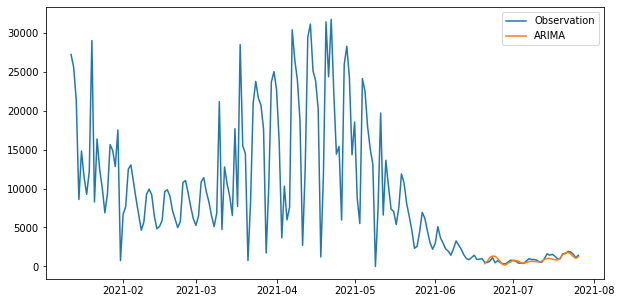

In [49]:
# The predicted plot for the month of July. We can oberve the orange line representing the prediction and the 
#blue as the true values. 

sarimax_prediction=results.predict(
start=start1_date, end='2021-07-26', dynamic=False)
plt.figure(figsize=(10,5))
l1,=plt.plot(CovidCases12, label='Observation')
l2,=plt.plot(sarimax_prediction, label='ARIMA')
plt.legend(handles=[l1,l2])
plt.ticklabel_format(style="plain", axis = 'y')
plt.savefig('SARIMAX prediction', bbox_inches='tight', transparent=False)

In [50]:
# Running auto arima for to find the season order.
import pmdarima as pm
stepwise = pm.auto_arima(CovidCases12,trace=True,suppress_warnings=True)
stepwise.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3984.315, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3975.153, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3940.802, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3982.397, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3929.419, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3927.095, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3971.255, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3915.411, Time=0.12 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3963.173, Time=0.05 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=3889.707, Time=0.16 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=3940.215, Time=0.08 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=3843.847, Time=0.21 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=3871.448, Time=0.17 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  196
Model:               SARIMAX(5, 1, 3)   Log Likelihood               -1895.265
Date:                Thu, 12 Aug 2021   AIC                           3808.529
Time:                        15:06:15   BIC                           3837.986
Sample:                             0   HQIC                          3820.456
                                - 196                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2947      0.119     -2.484      0.013      -0.527      -0.062
ar.L2         -0.1223      0.081     -1.509      0.131      -0.281       0.037
ar.L3         -0.5932      0.051    -11.602      0.000      -0.693      -0.493
ar.L4         -0.4903      0.061     -8.096      0.000      -0.609      -0.372
ar.L5         -0.4257      0.056     -7.631      0.000      -0.535      -0.316
ma.L1         -0.6620      0.134     -4.958      0.000      -0.924      -0.400
ma.L2         -0.1896      0.192     -0.987      0.324      -0.566       0.187
ma.L3          0.6334      0.117      5.393      0.000       0.403       0.864
sigma2      1.637e+07   2.05e-09   7.98e+15      0.000    1.64e+07    1.64e+07
===================================================================================
Ljung-Box (Q):                       38.42   Jarque-Bera (JB):                32.15
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               0.10   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.06e+31. Standard errors may be unstable.
"""

In [51]:
# Performing Adfuller test to check for the stationary.

from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
    
    dftest=adfuller(dataset,autolag='AIC')
    print("1. ADF: ", dftest[0])
    print("2. P-Value: ", dftest[1])
    print("3. Num of Lags: ", dftest[2])
    print("4. Number of observations used for ADF Regression and critival values calculation: ", dftest[2])
    print("5. Critical Values: ", dftest[4])
    for key, val in dftest[4].items():
        print("\t",key,":",val)
ad_test(CovidCases12)

1. ADF:  -1.0030253369532591
2. P-Value:  0.7521592803228645
3. Num of Lags:  10
4. Number of observations used for ADF Regression and critival values calculation:  10
5. Critical Values:  {'1%': -3.4662005731940853, '5%': -2.8772932777920364, '10%': -2.575167750182615}
	 1% : -3.4662005731940853
	 5% : -2.8772932777920364
	 10% : -2.575167750182615


In [52]:
#Building the same model to predict future for the month of August and September.
model2 = SARIMAX(CovidCases12,order=(5,1,3))
model2= model2.fit(disp=True)
#model2.summary()
index_feature_dates=pd.date_range(start='2021-07-27', end='2021-09-30')
pred = model2.predict(start=len(CovidCases12),end=len(CovidCases12)+65).rename('Confirmed')
pred.index= index_feature_dates
print(pred)

c:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



2021-07-27    1525.576430
2021-07-28    1914.001959
2021-07-29    2077.647729
2021-07-30    1969.337441
2021-07-31    1583.909531
                 ...     
2021-09-26    1627.803211
2021-09-27    1537.573512
2021-09-28    1551.085898
2021-09-29    1655.044133
2021-09-30    1771.600732
Freq: D, Name: Confirmed, Length: 66, dtype: float64


<AxesSubplot:>

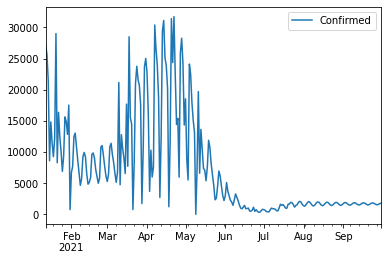

In [53]:
# This graph represents the total cases difference graph after concatenating the predicted values to the dataframe

preditions = pd.DataFrame(pred)
preditions
frames = [CovidCases12, preditions]
  
CovidCases12 = pd.concat(frames)
CovidCases12.plot()

In [54]:
CovidCases12

,Confirmed
2021-01-12,27210.000000
2021-01-13,25566.000000
2021-01-14,21343.000000
2021-01-15,8593.000000
2021-01-16,14817.000000
...,...
2021-09-26,1627.803211
2021-09-27,1537.573512
2021-09-28,1551.085898
2021-09-29,1655.044133


In [93]:
#The plot says that the COVID cases in August and in September would be around 1500 to 2000 on an average every day. 
fig = px.line(CovidCases12, x=CovidCases12.index, y="Confirmed", title='Situation in September')
fig.show()


In [55]:
CovidCases1

,Unnamed: 0,Country,Confirmed,Recovered,Deaths
Date,,,,,
2021-01-11,37843,Germany,1941116,1590171,41799
2021-01-12,37844,Germany,1968326,1616761,42889
2021-01-13,37845,Germany,1993892,1640682,44096
2021-01-14,37846,Germany,2015235,1661394,45207
2021-01-15,37847,Germany,2023828,1664176,45705
...,...,...,...,...,...
2021-07-22,38035,Germany,3758425,3642010,91505
2021-07-23,38036,Germany,3760291,3642120,91514
2021-07-24,38037,Germany,3761869,3643350,91531


In [56]:
#Similarly selecting feature to predict the Deaths due to COVID-19
CovidCases13 = CovidCases1[['Deaths']]

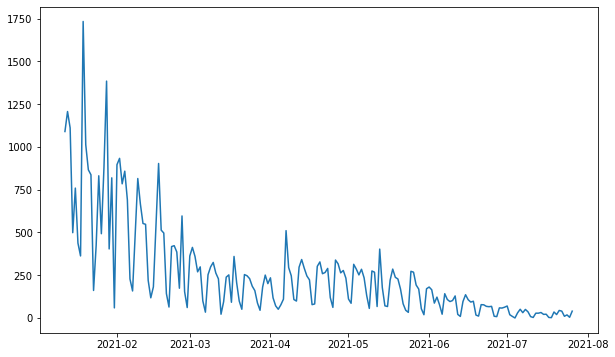

In [57]:
#The figure shows the everyday deaths in Germany.
plt.figure(figsize=(10,6))
plt.plot(CovidCases13.diff())

In [58]:
CovidCases13=CovidCases13.diff()
CovidCases13=CovidCases13.dropna()

In [59]:
start1_date='2021-06-20'
train=CovidCases13.loc[CovidCases13.index < pd.to_datetime(start1_date)]
test=CovidCases13.loc[CovidCases13.index >= pd.to_datetime(start1_date)]

In [60]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(CovidCases13, order=(4, 1, 4))
results=model.fit(disp=True)

c:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\python\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



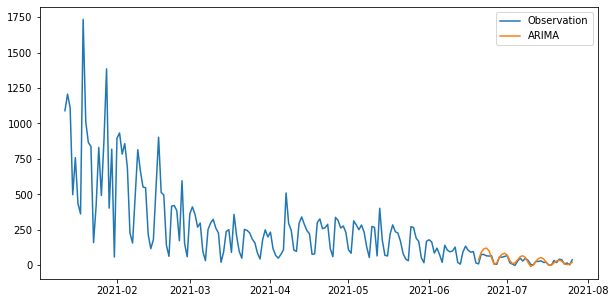

In [61]:
# The predicted plot for the month of July. We can oberve the orange line representing the prediction and the 
#blue as the true values. 

sarimax_prediction=results.predict(
start=start1_date, end='2021-07-26', dynamic=False)
plt.figure(figsize=(10,5))
l1,=plt.plot(CovidCases13, label='Observation')
l2,=plt.plot(sarimax_prediction, label='ARIMA')
plt.legend(handles=[l1,l2])
plt.ticklabel_format(style="plain", axis = 'y')
plt.savefig('SARIMAX prediction', bbox_inches='tight', transparent=False)

In [62]:
# Running auto arima for to find the season order.
import pmdarima as pm
stepwise = pm.auto_arima(CovidCases13,trace=True,suppress_warnings=True)
stepwise.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2670.750, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2648.534, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2594.066, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2668.862, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2590.899, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2589.508, Time=0.24 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2639.148, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2583.583, Time=0.34 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2640.354, Time=0.15 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=2530.137, Time=0.48 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=2601.400, Time=0.22 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=2509.996, Time=0.68 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=2555.249, Time=0.35 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  196
Model:               SARIMAX(4, 1, 4)   Log Likelihood               -1232.299
Date:                Thu, 12 Aug 2021   AIC                           2484.597
Time:                        15:06:33   BIC                           2517.327
Sample:                             0   HQIC                          2497.849
                                - 196                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -5.0343      1.972     -2.552      0.011      -8.900      -1.168
ar.L1          1.0822      0.158      6.855      0.000       0.773       1.392
ar.L2         -1.0427      0.154     -6.791      0.000      -1.344      -0.742
ar.L3          0.1492      0.112      1.337      0.181      -0.069       0.368
ar.L4         -0.2541      0.069     -3.677      0.000      -0.390      -0.119
ma.L1         -2.2643      0.166    -13.628      0.000      -2.590      -1.939
ma.L2          2.5382      0.348      7.304      0.000       1.857       3.219
ma.L3         -1.4749      0.330     -4.464      0.000      -2.122      -0.827
ma.L4          0.3481      0.137      2.545      0.011       0.080       0.616
sigma2      1.482e+04    804.162     18.433      0.000    1.32e+04    1.64e+04
===================================================================================
Ljung-Box (Q):                       55.10   Jarque-Bera (JB):               300.43
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               0.05   Skew:                            -0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [63]:
model2 = SARIMAX(CovidCases13,order=(4,1,4))
model2= model2.fit(disp=True)
#model2.summary()
index_feature_dates=pd.date_range(start='2021-07-27', end='2021-09-30')
pred = model2.predict(start=len(CovidCases13),end=len(CovidCases13)+65).rename('Deaths')
pred.index= index_feature_dates
print(pred)

c:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



2021-07-27    34.036217
2021-07-28    39.518965
2021-07-29    35.947484
2021-07-30    19.573397
2021-07-31     9.610565
                ...    
2021-09-26    13.085894
2021-09-27    22.946225
2021-09-28    35.268631
2021-09-29    40.854080
2021-09-30    35.561855
Freq: D, Name: Deaths, Length: 66, dtype: float64


c:\python\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<AxesSubplot:>

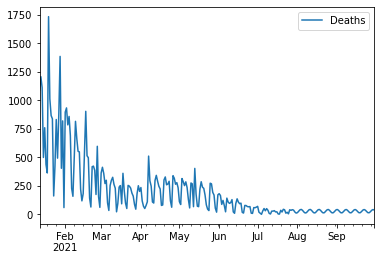

In [64]:
# This graph represents the total Deaths difference graph after concatenating the predicted values to the dataframe

preditions = pd.DataFrame(pred)
preditions
frames = [CovidCases13, preditions]
  
CovidCases13 = pd.concat(frames)
CovidCases13.plot()

In [95]:
#the deaths in August and September would be around 40 to 50 every day on an aver-age
fig = px.line(CovidCases13, x=CovidCases13.index, y="Deaths", title='Situation in September')
fig.show()

In [65]:
CovidCases1

,Unnamed: 0,Country,Confirmed,Recovered,Deaths
Date,,,,,
2021-01-11,37843,Germany,1941116,1590171,41799
2021-01-12,37844,Germany,1968326,1616761,42889
2021-01-13,37845,Germany,1993892,1640682,44096
2021-01-14,37846,Germany,2015235,1661394,45207
2021-01-15,37847,Germany,2023828,1664176,45705
...,...,...,...,...,...
2021-07-22,38035,Germany,3758425,3642010,91505
2021-07-23,38036,Germany,3760291,3642120,91514
2021-07-24,38037,Germany,3761869,3643350,91531


In [66]:
GERDelta1

,location,date,variant,2_weeks_Delta_cases,2_weeks_Delta_cases_%,2_weeks_Delta_tests,Average Daily Delta variants
18,Germany,2021-01-11,Delta,0.0,0.00,483,0.000000
19,Germany,2021-01-25,Delta,0.0,0.00,3029,0.000000
20,Germany,2021-02-08,Delta,1.0,0.02,6115,0.071429
21,Germany,2021-02-22,Delta,0.0,0.00,8953,0.000000
22,Germany,2021-03-08,Delta,0.0,0.00,11409,0.000000
23,Germany,2021-03-22,Delta,1.0,0.01,14371,0.071429
24,Germany,2021-04-05,Delta,3.0,0.02,16259,0.214286
25,Germany,2021-04-19,Delta,29.0,0.15,19268,2.071429
26,Germany,2021-05-03,Delta,133.0,0.69,19182,9.500000
27,Germany,2021-05-17,Delta,303.0,1.95,15548,21.642857


In [67]:
GERDelta1 = GERDelta1.iloc[:-1,:]

In [68]:
GERDelta1=GERDelta1.set_index(['date'])

In [69]:
Deltacases = GERDelta1[['2_weeks_Delta_cases_%']]

In [71]:
CovidCases1['DeltaCasesPerc'] = Deltacases

In [72]:
CovidCases1['DeltaCasesPerc'] = CovidCases1.DeltaCasesPerc.fillna(method='ffill')

In [73]:
CovidCases1.head()

,Unnamed: 0,Country,Confirmed,Recovered,Deaths,DeltaCasesPerc
Date,,,,,,
2021-01-11,37843,Germany,1941116,1590171,41799,0.0
2021-01-12,37844,Germany,1968326,1616761,42889,0.0
2021-01-13,37845,Germany,1993892,1640682,44096,0.0
2021-01-14,37846,Germany,2015235,1661394,45207,0.0
2021-01-15,37847,Germany,2023828,1664176,45705,0.0


In [84]:
#Calculating the probable Delta cases using the Delta dataset and normal COVID dataset.
CovidCases1['Probable_Cases'] = (CovidCases1['newCases']/100)*CovidCases1['DeltaCasesPerc']

In [85]:
CovidCases1 = CovidCases1[['Country','Confirmed','Recovered','Deaths','DeltaCasesPerc','Probable_Cases']]

In [86]:
CovidCases1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 197 entries, 2021-01-11 to 2021-07-26
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         197 non-null    object 
 1   Confirmed       197 non-null    int64  
 2   Recovered       197 non-null    int64  
 3   Deaths          197 non-null    int64  
 4   DeltaCasesPerc  197 non-null    float64
 5   Probable_Cases  197 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 10.8+ KB


In [88]:
CovidCases1['newCases'] = CovidCases1.Confirmed.diff()

In [89]:
CovidCases1=CovidCases1.fillna(28000)

In [91]:
CovidCases1['Probable_Cases'] = CovidCases1['Probable_Cases'].astype(np.int64)

In [92]:
#The dataset contains both the covid cases and probable delta cases
CovidCases1

,Country,Confirmed,Recovered,Deaths,DeltaCasesPerc,Probable_Cases,newCases
Date,,,,,,,
2021-01-11,Germany,1941116,1590171,41799,0,0,"28,000"
2021-01-12,Germany,1968326,1616761,42889,0,0,"27,210"
2021-01-13,Germany,1993892,1640682,44096,0,0,"25,566"
2021-01-14,Germany,2015235,1661394,45207,0,0,"21,343"
2021-01-15,Germany,2023828,1664176,45705,0,0,"8,593"
...,...,...,...,...,...,...,...
2021-07-22,Germany,3758425,3642010,91505,80,1544,"1,928"
2021-07-23,Germany,3760291,3642120,91514,80,1495,"1,866"
2021-07-24,Germany,3761869,3643350,91531,80,1264,"1,578"


The blue lines represent the daily covid cases from Jan 2021 to July 2021 and we can observe the covid cases
have been decreased gradually from June till end of July. 
The number of cases reported at the end of July is 1423 and according to Delta variant tests more than 90% 
of the cases are Delta so we can say that the orange line represent-ing the probable Delta cases. 
By the end of July, the Delta cases reported daily on an average is 1149. 

In [98]:

fig = px.line(CovidCases1, x=CovidCases1.index, y=["newCases","Probable_Cases"], title='Situation in September')
fig.show()

# Drawing Conclusion: From the above analysis of overall COVID-19 cases and deaths. For the above analysis if we consider the Delta count, currently it is more than 90% of the reported cases are Delta variant and when we calculate the percentage, we get the underlying probable cases. Hence the total cases for COVID are getting reduced as many people are vaccinated but most of the cases are Delta Variants.

# Use Case 4:

In [99]:
#Importing Germany Vaccination dataset
Germany = pd.read_csv('covid_de_vaccines.csv')

In [102]:
Germany.tail()

,date,doses,doses_first,doses_second,pfizer_cumul,moderna_cumul,astrazeneca_cumul,persons_first_cumul,persons_full_cumul
222,2021-08-06,430046,79909,350137,71081911,8699966,12545269,51892210,45433158
223,2021-08-07,177664,39583,138081,71216058,8729404,12546809,51944332,45571239
224,2021-08-08,112207,22798,89409,71302850,8750082,12547718,51970958,45660648
225,2021-08-09,282302,49844,232458,71531233,8790241,12553031,52029249,45893106
226,2021-08-10,404541,69690,334851,71878525,8830584,12560868,52108008,46227957


In [111]:
Germany['date'] = pd.to_datetime(Germany['date'], format='%Y-%m-%d')

In [116]:
#we can see that the vaccination rate from May to August has increased very fast as almost over 50 Million
#people have been received 1st dose and 40 million people have been received both the doses.
fig = px.line(Germany, x=Germany['date'], y=["persons_first_cumul","persons_full_cumul"], title='Vaccination rate')
fig.show()

In [155]:
Germany2 = Germany.iloc[[-1]]

In [156]:
Germany2=Germany2.loc[:,Germany2.columns!='date']

In [157]:
Germanypop = Germany2[['persons_full_cumul']]

In [148]:
Germany2=Germany2[['moderna_cumul','astrazeneca_cumul','pfizer_cumul']]

In [160]:
#Appending Germany population
Germanypop['population'] = 83000000

In [170]:
Germanypop['Vaccination'] = '>50%'

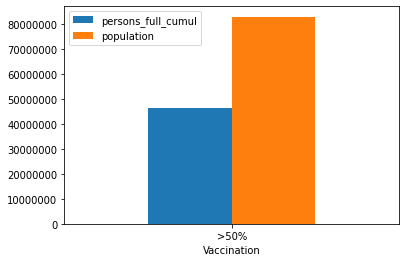

In [172]:
#we can see that almost 50% of the people have been fully vaccinated 
Germanypop.plot(x="Vaccination", y=["persons_full_cumul", "population"], kind="bar")
plt.ticklabel_format(style="plain", axis = 'y')
plt.xticks(rotation = 360)
plt.legend(loc='upper left')

In [152]:
#pie chart shows the type of vaccinations used in Germany.
#The higest is Astra Zeneca where it is used by almost 44% and 12 Million doses have been administred 
fig = px.pie(Germany2, values=[8830584,12560868,7187525], names=['moderna','astrazeneca','pfizer'])
fig.show()

# If the German Government succeeds vaccinating 100%, continue following certain rules like Social Distancing, Wearing Masks, Getting rt-pcr done while travelling far and avoid public gathering the Delta variants and also other COVID variants can be avoided. The Delta Variant in Europe is spreading faster as it has reached peak in United Kingdom. So the strain has come to Germany in January last week and continued to spread across all the states up to 90% of the total cases

